In [12]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8746 - loss: 0.4459 - val_accuracy: 0.9642 - val_loss: 0.1284
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1305 - val_accuracy: 0.9660 - val_loss: 0.1198
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0818 - val_accuracy: 0.9770 - val_loss: 0.0834
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9816 - loss: 0.0598 - val_accuracy: 0.9745 - val_loss: 0.0865
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0451 - val_accuracy: 0.9773 - val_loss: 0.0805
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accuracy: 0.9765 - val_loss: 0.0832
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9793 - val_loss: 0.0839
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9943 - loss: 0.0213 - 

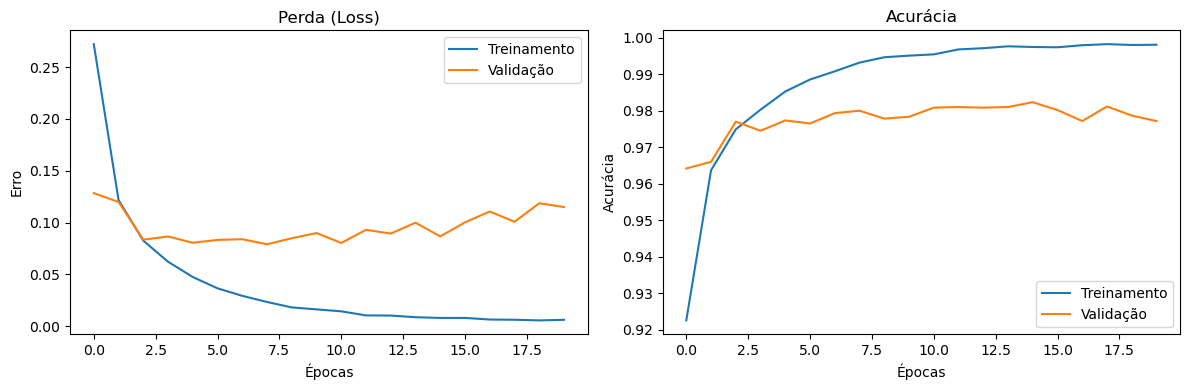

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


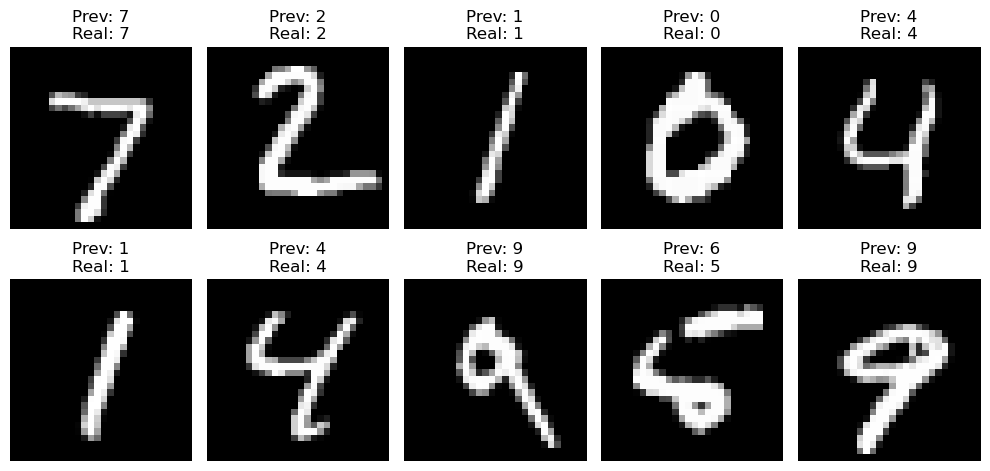

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. Carregar dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalizar e preparar os dados
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 3. Criar o modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 4. Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Treinar o modelo e guardar o histórico
history = model.fit(x_train, y_train_cat,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# 6. Avaliar o modelo
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f'Acurácia no teste: {accuracy:.2f}')

# 7. Plotar o gráfico de perda
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()

# 8. Plotar o gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

# 9. (Extra) Mostrar algumas previsões
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar 10 imagens com a previsão e o valor real
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Prev: {predicted_labels[i]}\nReal: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()